# Importing the libraries

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# Evaluating Algorithms
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import metrics



# Importing the Dataset

In [2]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv("/kaggle/input/hypertension-risk-model-main/Hypertension-risk-model-main.csv")

# Handling missing values

In [3]:
# checking for missing values
missing_data=data.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")



Missing data:
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64
The total percentage of missing data is 12.74%


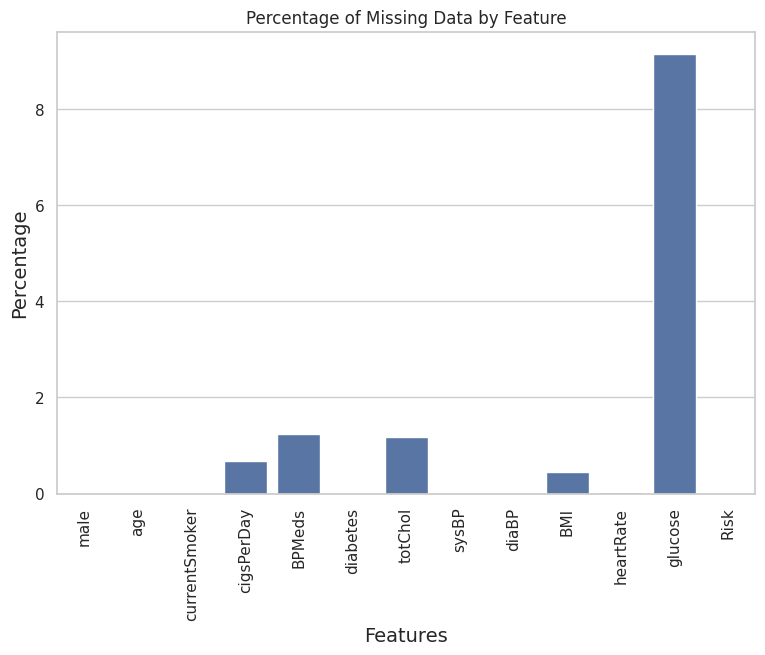

In [4]:
# Calculate the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(data)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [5]:
# Drop missing values
data.dropna(axis=0,inplace=True)

In [6]:
# checking for missing values
missing_data=data.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64
The total percentage of missing data is 0.0%


In [7]:
data.shape

(3751, 13)

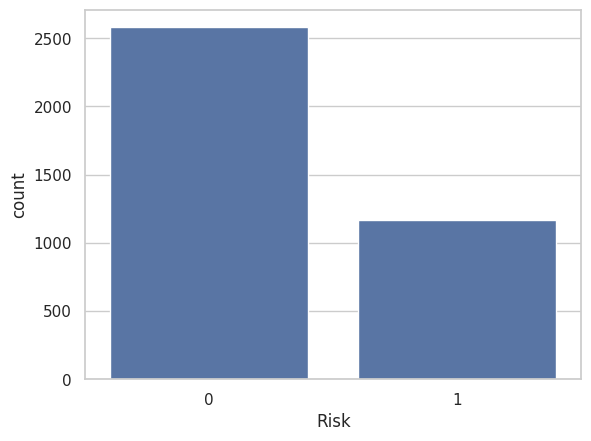

There are 2581 patients without risk of Hypertension and 1170 patients with risk of Hypertension


In [8]:
sns.countplot(x="Risk",data=data)
plt.show()
cases=data.Risk.value_counts()
print(f"There are {cases[0]} patients without risk of Hypertension and {cases[1]} patients with risk of Hypertension")

In [9]:
data["age"].unique

<bound method Series.unique of 0       39
1       46
2       48
3       61
4       46
        ..
4233    50
4234    51
4237    52
4238    40
4239    39
Name: age, Length: 3751, dtype: int64>

In [10]:
data["age"].min()

32

In [11]:
data["age"].max()

70

# Exploratory Data Analysis

/tmp/ipykernel_77/2619390697.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


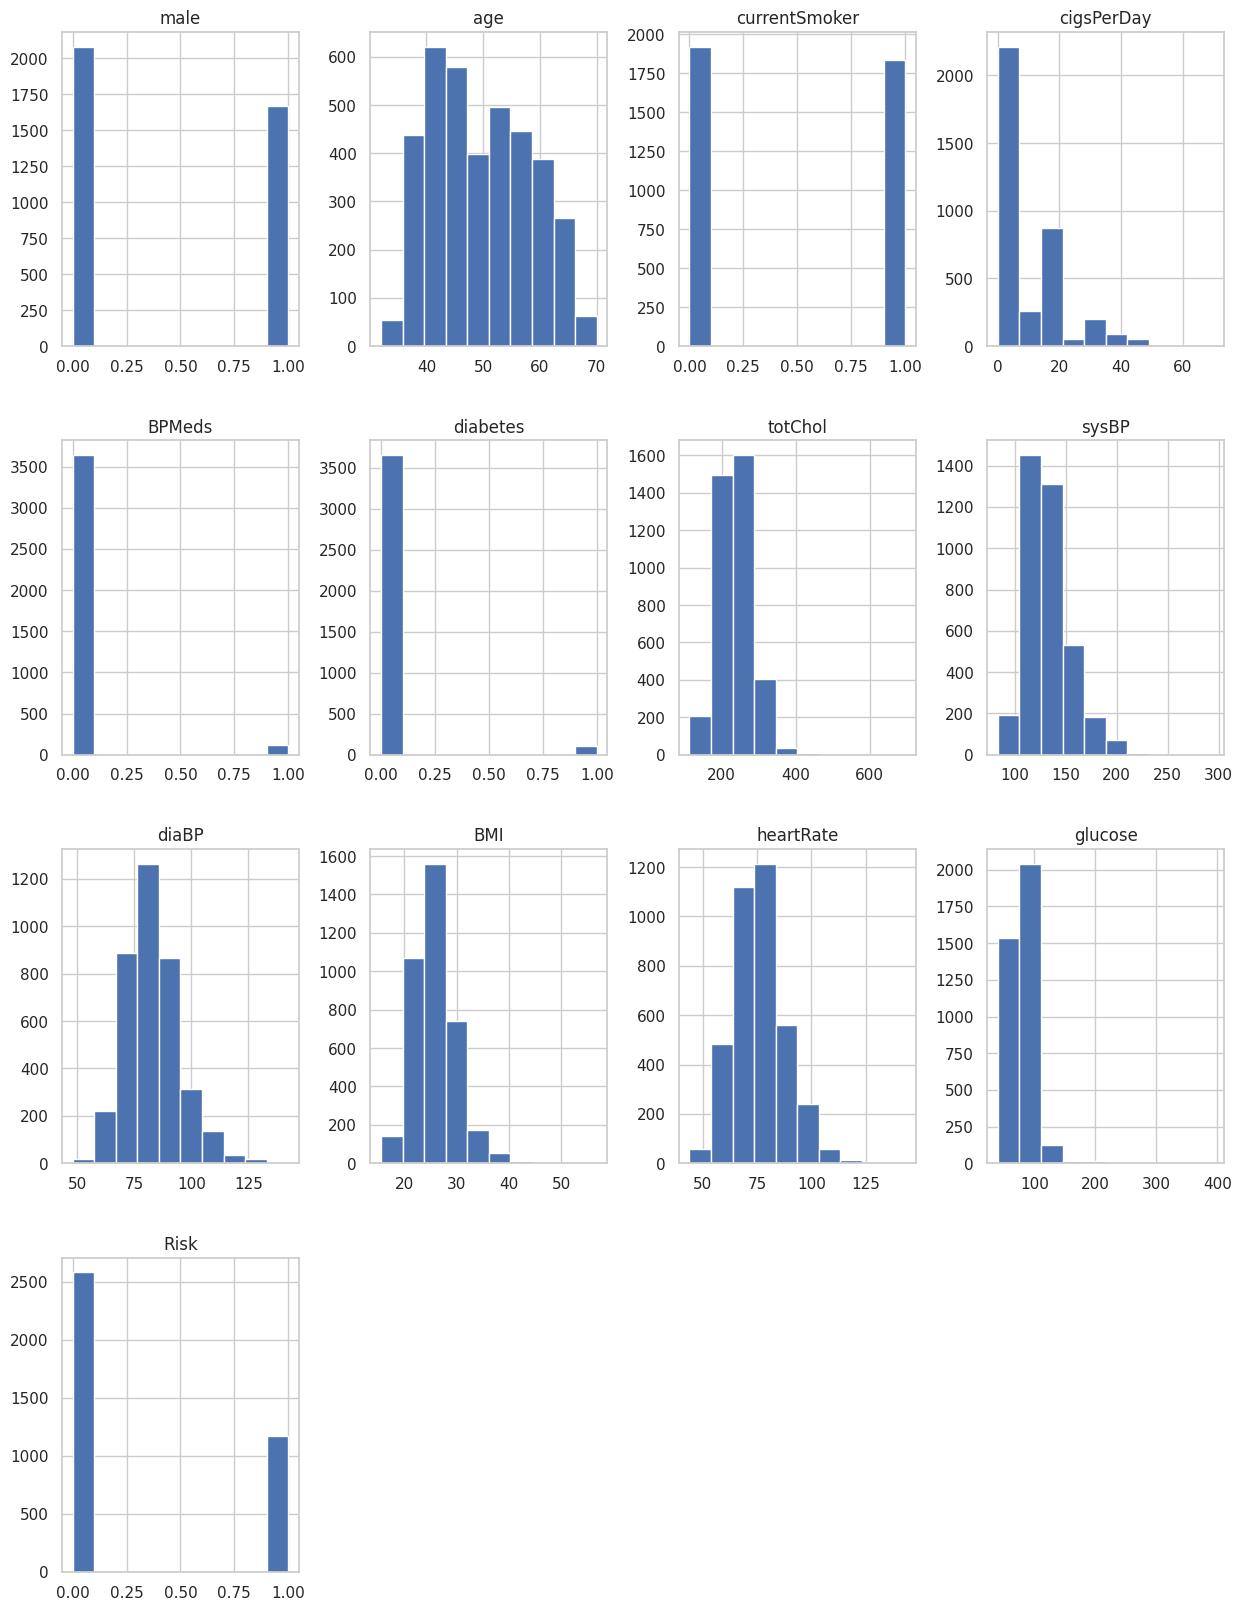

In [12]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
data.hist(ax = ax)
plt.show()

# Data Processing

In [13]:
# Seperating Categorical colums and numerical colums
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
      cont_val.append(column)

# Encoding categorical data

In [14]:
cate_val

['male', 'currentSmoker', 'BPMeds', 'diabetes', 'Risk']

In [15]:
cont_val

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);
/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);


/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);
/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);


/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);
/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);


/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);
/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);


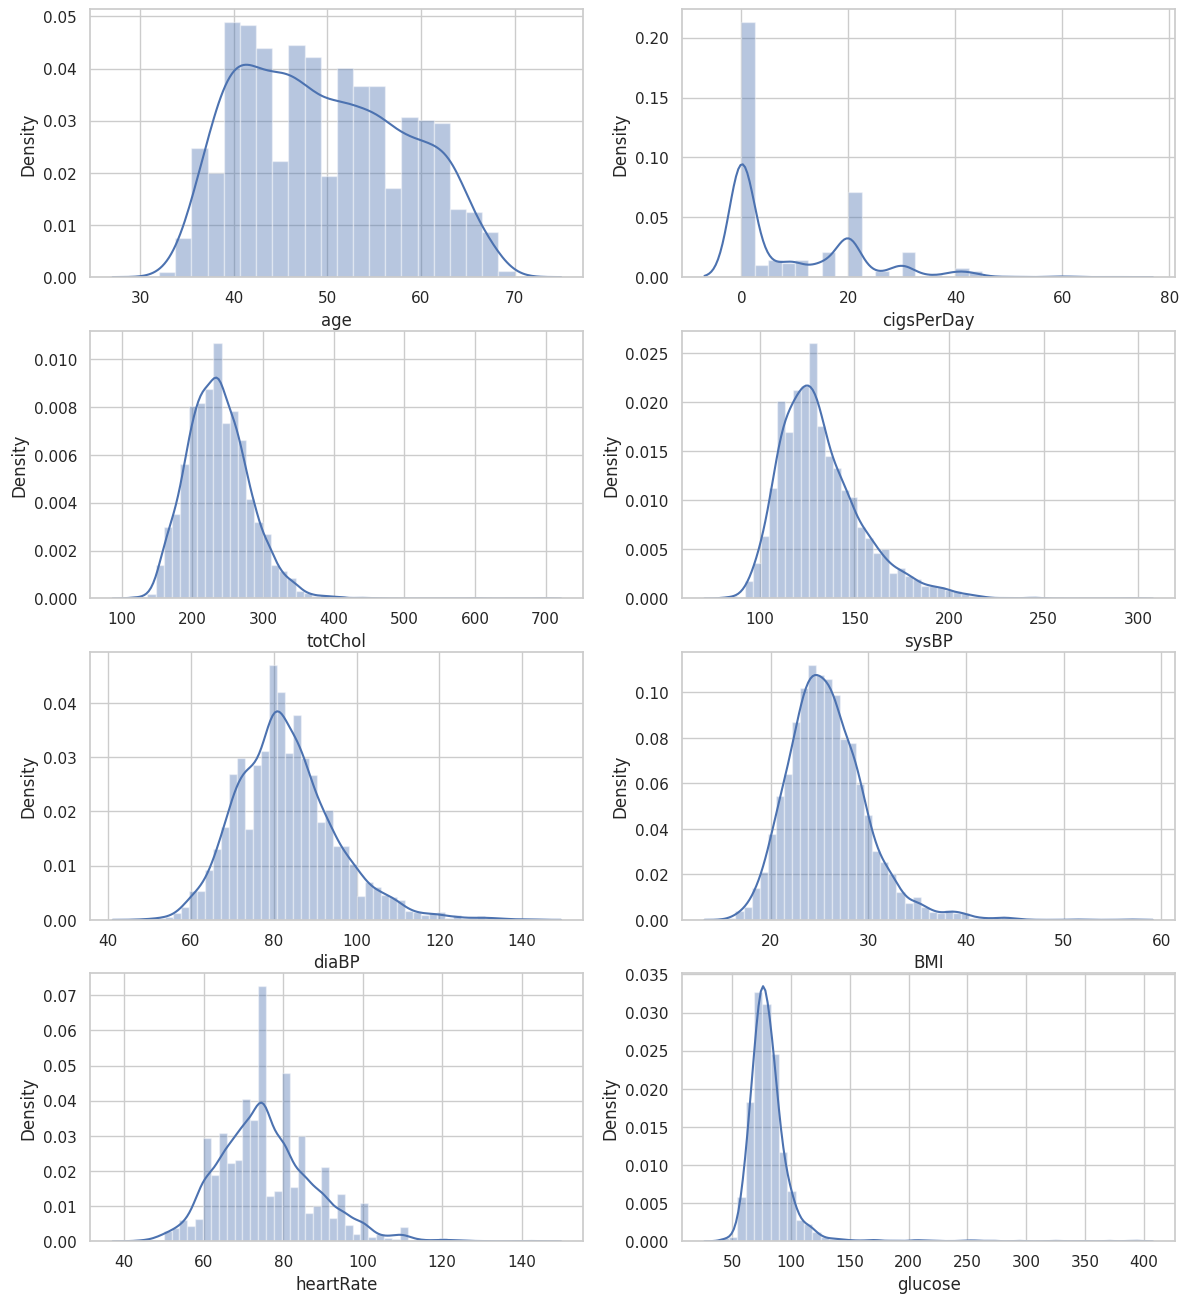

In [16]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in cont_val:
    sns.distplot(data[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

/tmp/ipykernel_77/1280439329.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Risk'] == 0]['age'], label='No risk of Hypertension')
/tmp/ipykernel_77/1280439329.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Risk'] == 1]['age'], label = 'Risk of Hypertension')


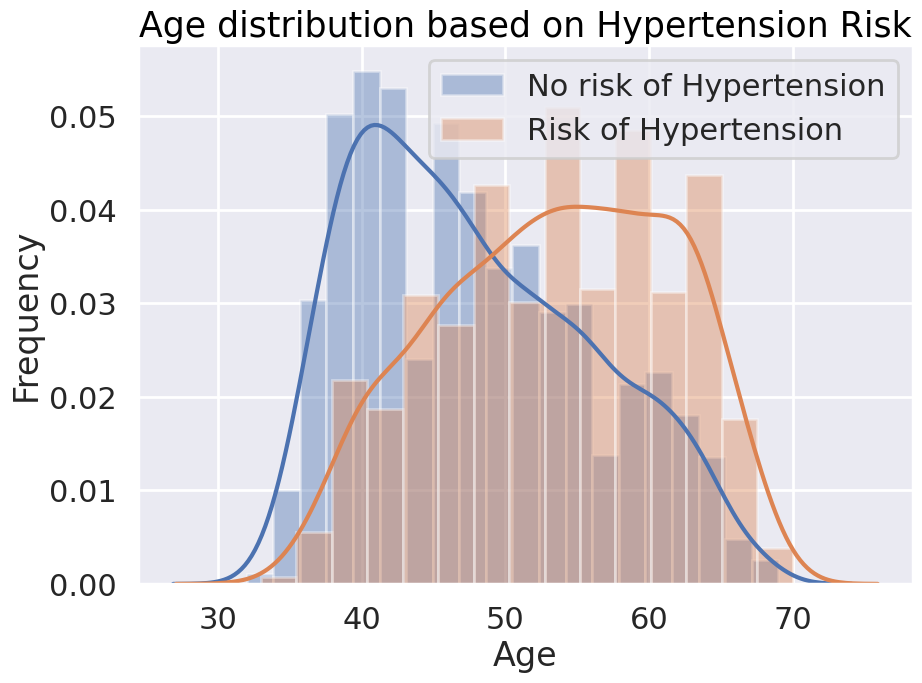

In [17]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on Hypertension Risk', color="Black",fontsize=25)

sns.distplot(data[data['Risk'] == 0]['age'], label='No risk of Hypertension')
sns.distplot(data[data['Risk'] == 1]['age'], label = 'Risk of Hypertension')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

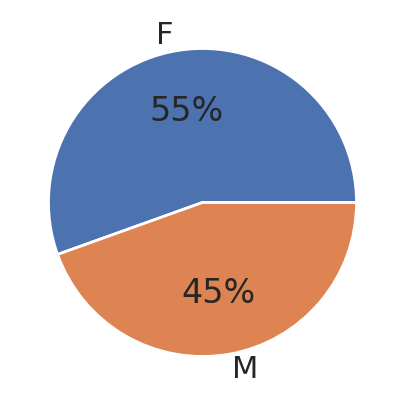

In [18]:
# list for the sex column
gender = ['F','M']

# make an object which store value count of the elements in sex column
gender_data = pd.Series(data['male']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(5,5))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

plt.show()

# Statistics on the variables

In [19]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.311917
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.463338
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Checking the target variable

In [20]:
data["Risk"].value_counts(normalize=True)


Risk
0    0.688083
1    0.311917
Name: proportion, dtype: float64

In [21]:
#15% of the data indcates positive risk of hypertension in the near future

# Feature Selection using Chi Square (Category)

In [22]:
cate_val=data[['male','currentSmoker','BPMeds','diabetes']]

In [23]:
cate_val

,male,currentSmoker,BPMeds,diabetes
0,1,0,0.0,0
1,0,0,0.0,0
2,1,1,0.0,0
3,0,1,0.0,0
4,0,1,0.0,0
...,...,...,...,...
4233,1,1,0.0,0
4234,1,1,0.0,0
4237,0,0,0.0,0
4238,1,0,0.0,0


In [24]:
from sklearn.feature_selection import chi2
X = cate_val
y = data['Risk']

In [25]:
chi_scores = chi2(X,y)

In [26]:
chi_scores

(array([2.67929705e-02, 2.12611918e+01, 2.51482051e+02, 2.45535880e+01]),
 array([8.69978667e-01, 4.00763549e-06, 1.23407877e-56, 7.22716419e-07]))

<Axes: >

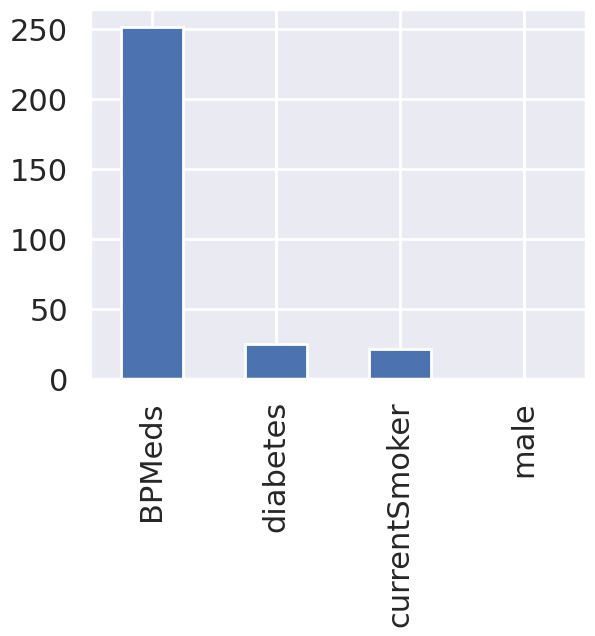

In [27]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()


<Axes: >

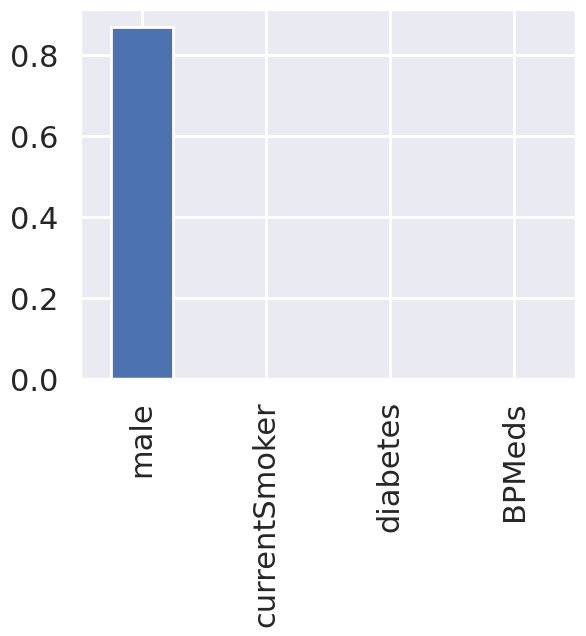

In [28]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

# Feature Scaling

In [29]:
#putting the features into the same scale
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#st = StandardScaler()
#data[cont_val] = st.fit_transform(data[cont_val])

In [32]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [33]:
# Load your dataset
df = pd.read_csv("/kaggle/input/hypertension-risk-model-main/Hypertension-risk-model-main.csv")

# Assuming your target variable is named 'target'
target_variable = 'Risk'

# Count the occurrences of each class
class_counts = df[target_variable].value_counts()

# Identify the minority and majority class
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Print or use the information as needed
print(f"Minority class: {minority_class}")
print(f"Majority class: {majority_class}")

Minority class: 1
Majority class: 0


In [34]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/257.7 kB ? eta -:--:--

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/257.7 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 143.4/257.7 kB 1.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [36]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

# Splitting the Dataset into Training Set and Test Set

In [37]:
X = data.drop('Risk',axis=1)

In [38]:
y = data['Risk']

In [39]:
X_train,X_test,y_train,y_test=train_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
y_test

2435    0
1168    1
3761    1
496     0
3983    1
       ..
2723    0
3540    1
685     1
3036    0
2289    1
Name: Risk, Length: 751, dtype: int64

# Training the Model Using Different Classificiation Algorithms

# Logistic Regression

In [41]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [42]:
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred1 = log.predict(X_test)

In [44]:
#Checking the Accuracy
accuracy_score(y_test,y_pred1)

0.8322237017310253

AUC: 0.88
Precision: 0.79
F1-score: 0.70
Recall: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       516
           1       0.79      0.63      0.70       235

    accuracy                           0.83       751
   macro avg       0.82      0.78      0.79       751
weighted avg       0.83      0.83      0.83       751



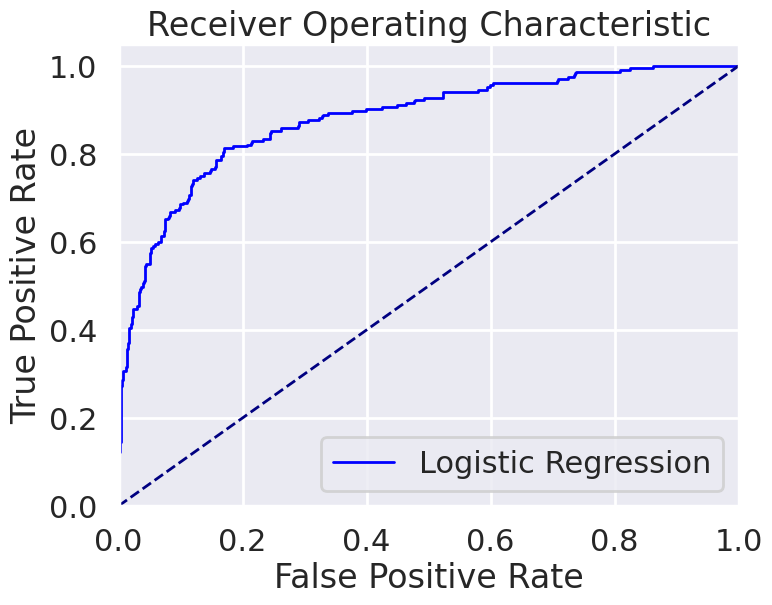

True Positive (TP): 147
True Negative (TN): 478
False Positive (FP): 38
False Negative (FN): 88
Confusion matrix:
[[478  38]
 [ 88 147]]
Detection Accuracy: 83.22%
Detection Error: 16.78%


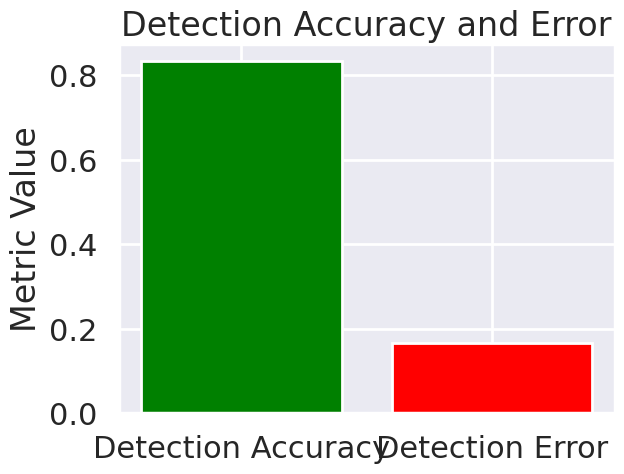

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score, classification_report

# AUC
y_prob = log.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

# Precision
precision = precision_score(y_test, y_pred1)

# F1-score
f1 = f1_score(y_test, y_pred1)

# Recall
recall = recall_score(y_test, y_pred1)




# Classification Report
class_report = classification_report(y_test, y_pred1)

print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print("Classification Report:\n", class_report)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate confusion matrix
conf_matrix = confusion_matrix (y_test, y_pred1)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print or use these values as needed
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
#Calculate detection accuracy
detection_accuracy = accuracy_score(y_test, y_pred1)

#Calculate detection error
detection_error = 1 - detection_accuracy

#Display results
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Detection Accuracy: {detection_accuracy:.2%}")
print(f"Detection Error: {detection_error:.2%}")

#Setting a threshold for binary classification
threshold = 0.5
y_pred1 = (y_prob > threshold).astype(int)

#Calculate detection accuracy and error
accuracy = metrics.accuracy_score(y_test, y_pred1)
error = 1 - accuracy

#Bar plot
labels = ['Detection Accuracy', 'Detection Error']
values = [accuracy, error]

plt.bar(labels, values, color = ['green', 'red'])
plt.ylabel('Metric Value')
plt.title('Detection Accuracy and Error')
plt.show()

# SVM

In [46]:
from sklearn.svm import SVC
svm = svm.SVC()

In [47]:
svm.fit(X_train,y_train)

SVC()

In [48]:
y_pred2 = svm.predict(X_test)

In [49]:
#Checking the Accuracy
accuracy_score(y_test,y_pred2)

0.8801597869507324

AUC: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       516
           1       0.85      0.75      0.80       235

    accuracy                           0.88       751
   macro avg       0.87      0.85      0.86       751
weighted avg       0.88      0.88      0.88       751



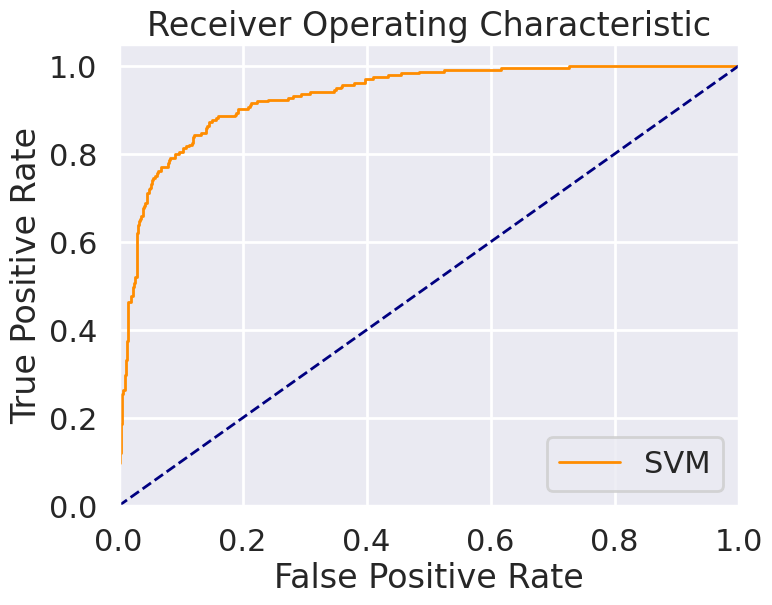

True Positive (TP): 177
True Negative (TN): 484
False Positive (FP): 32
False Negative (FN): 58
Confusion matrix:
[[484  32]
 [ 58 177]]
Detection Accuracy: 88.02%
Detection Error: 11.98%


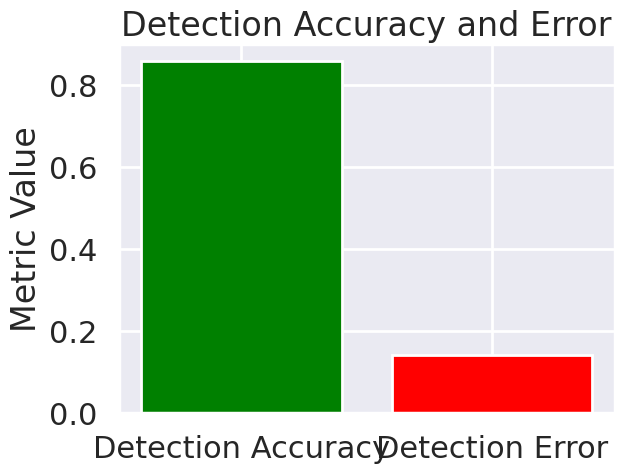

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score, classification_report


# Make predictions on the test data
y_pred2 = svm.predict(X_test)

# Calculate the AUC score
y_prob = svm.decision_function(X_test)  # Get decision function scores for AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision, F1-score, and recall
print(f'AUC: {roc_auc:.2f}')
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)

# Display classification report with precision, recall, F1-score, and support
class_report = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report)

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate confusion matrix
conf_matrix = confusion_matrix (y_test, y_pred2)
# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print or use these values as needed
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

#Calculate detection accuracy
detection_accuracy = accuracy_score(y_test, y_pred2)

#Calculate detection error
detection_error = 1 - detection_accuracy

#Display results
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Detection Accuracy: {detection_accuracy:.2%}")
print(f"Detection Error: {detection_error:.2%}")

#Setting a threshold for binary classification
threshold = 0.5
y_pred2 = (y_prob > threshold).astype(int)

#Calculate detection accuracy and error
accuracy = metrics.accuracy_score(y_test, y_pred2)
error = 1 - accuracy

#Bar plot
labels = ['Detection Accuracy', 'Detection Error']
values = [accuracy, error]

plt.bar(labels, values, color = ['green', 'red'])
plt.ylabel('Metric Value')
plt.title('Detection Accuracy and Error')
plt.show()





# Decision Tree Classifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred3= dt.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred3)

0.8495339547270306

AUC: 0.8221425037110341
Precision: 0.7652173913043478
Recall: 0.7489361702127659
F1-Score: 0.7569892473118279

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       516
           1       0.77      0.75      0.76       235

    accuracy                           0.85       751
   macro avg       0.83      0.82      0.82       751
weighted avg       0.85      0.85      0.85       751



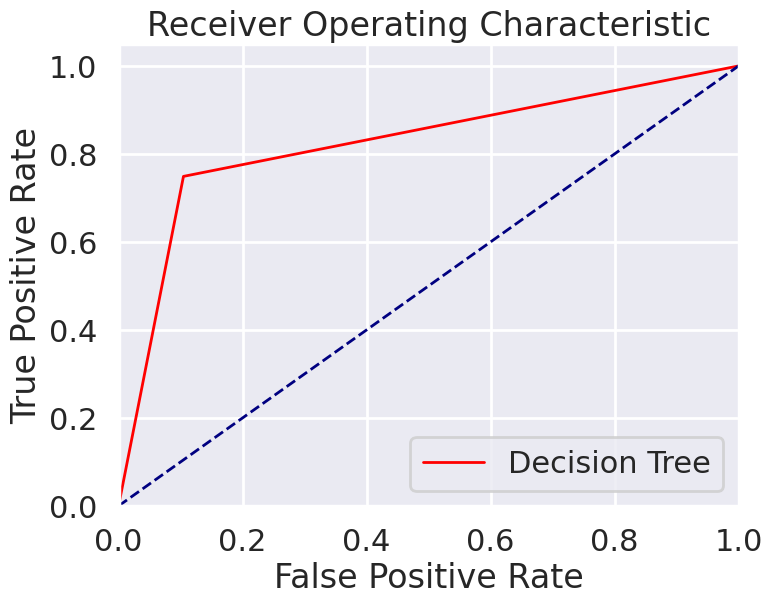

True Positive (TP): 176
True Negative (TN): 462
False Positive (FP): 54
False Negative (FN): 59
Confusion matrix:
[[462  54]
 [ 59 176]]
Detection Accuracy: 84.95%
Detection Error: 15.05%


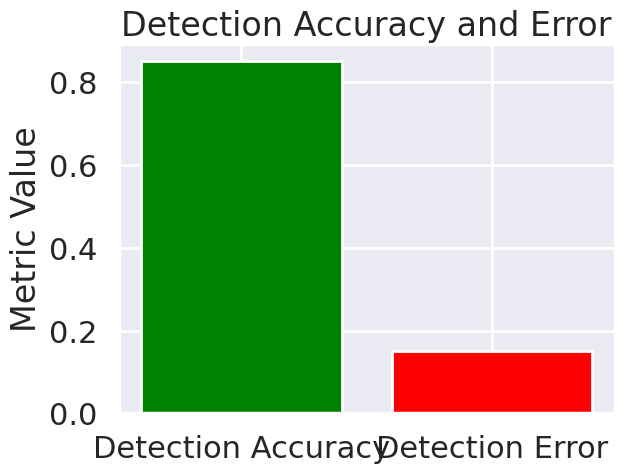

In [55]:
y_prob = dt.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Calculate Precision, Recall, and F1-score
y_pred3 = dt.predict(X_test)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

# Classification Report for more details
report = classification_report(y_test, y_pred3)

print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", report)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate confusion matrix
conf_matrix = confusion_matrix (y_test, y_pred3)
# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print or use these values as needed
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

#Calculate detection accuracy
detection_accuracy = accuracy_score(y_test, y_pred3)

#Calculate detection error
detection_error = 1 - detection_accuracy

#Display results
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Detection Accuracy: {detection_accuracy:.2%}")
print(f"Detection Error: {detection_error:.2%}")

#Setting a threshold for binary classification
threshold = 0.5
y_pred3 = (y_prob > threshold).astype(int)

#Calculate detection accuracy and error
accuracy = metrics.accuracy_score(y_test, y_pred3)
error = 1 - accuracy

#Bar plot
labels = ['Detection Accuracy', 'Detection Error']
values = [accuracy, error]

plt.bar(labels, values, color = ['green', 'red'])
plt.ylabel('Metric Value')
plt.title('Detection Accuracy and Error')
plt.show()

# Random Forest Classifier

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
 y_pred4 = rf.predict (X_test)

In [59]:
accuracy_score(y_test,y_pred4)

0.8908122503328895

AUC: 0.82
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       516
           1       0.80      0.86      0.83       235

    accuracy                           0.89       751
   macro avg       0.87      0.88      0.88       751
weighted avg       0.89      0.89      0.89       751



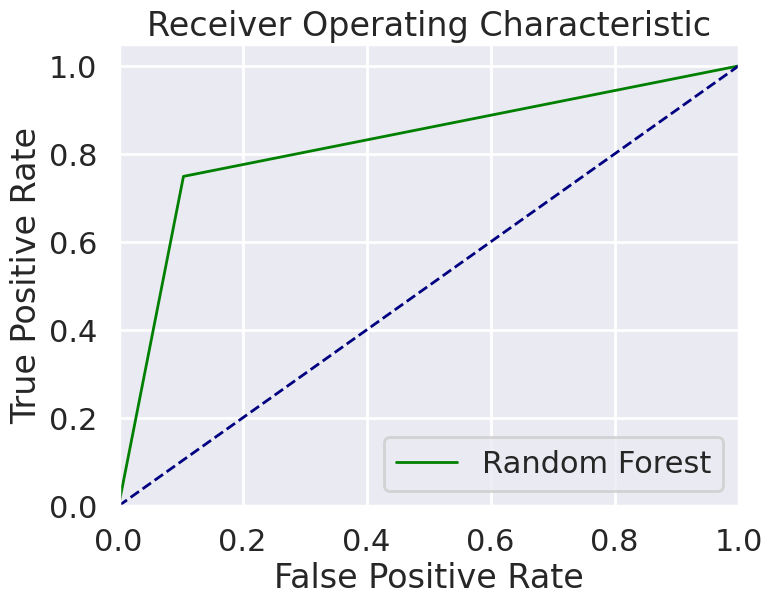

In [60]:
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score:.2f}')
y_pred4 = rf.predict(X_test)
report = classification_report(y_test, y_pred4)
print(report)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [61]:
final_data = pd.DataFrame({'Models': ['LR', 'SVM','DT', 'RF'], 'ACC':[accuracy_score(y_test,y_pred1),
                                                                      accuracy_score(y_test,y_pred2),
                                                                      accuracy_score(y_test,y_pred3),
                                                                      accuracy_score(y_test,y_pred4)]})

In [62]:
final_data

,Models,ACC
0,LR,0.832224
1,SVM,0.857523
2,DT,0.849534
3,RF,0.890812


<Axes: xlabel='Models', ylabel='ACC'>

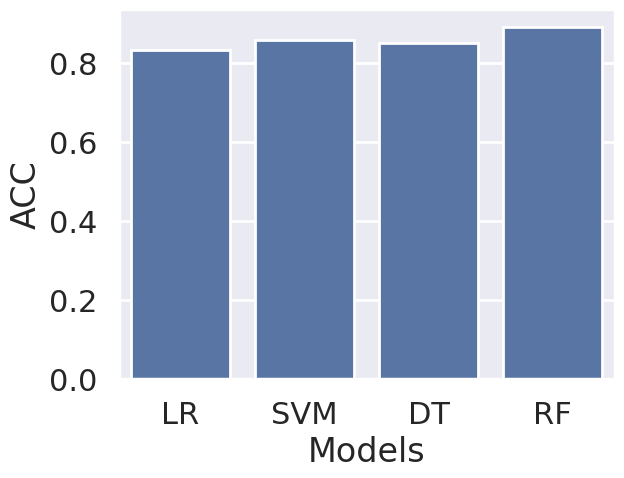

In [63]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

# Training Random Forest on the entire dataset

In [64]:
X = data.drop('Risk',axis=1)
y=data['Risk']

In [65]:
X.shape

(3751, 12)

In [66]:
from sklearn.ensemble import RandomForestClassifier


In [67]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# Prediction on New Data

In [68]:
new_data = pd.DataFrame({
    'male': 1,
    'age': 39,
    'currentSmoker': 0,
    'cigsPerDay': 0,
    'BPMeds': 0,
    'diabetes': 0,
    'totChol': 195,
    'sysBP': 106,
    'diaBP': 70,
    'BMI': 26.97,
    'heartRate': 80,
    'glucose': 77,
}, index=[0])

In [69]:
new_data

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0,0,0,195,106,70,26.97,80,77


In [70]:
p = rf.predict (new_data)
if p[0]==0:
  print("No Risk of Hypertension")
else:
  print("Risk of Hypertension")

No Risk of Hypertension


# Save Model using Joblib

In [71]:
import joblib

In [72]:
joblib.dump(rf,'model_joblib_hypertension')

['model_joblib_hypertension']

In [73]:
model = joblib.load('model_joblib_hypertension')

In [74]:
model.predict(new_data)

array([0])

# Creating the GUI

In [75]:
from tkinter import *
import joblib

In [76]:
from tkinter import Tk, Label, Entry, Button
import joblib

def show_entry_fields(entries, result_label):
    # Convert entry values to appropriate types
    values = [float(entry.get()) if i == 9 else int(entry.get()) for i, entry in enumerate(entries)]
    
    # Perform prediction and define the result variable
    # Example: Replace this with your actual prediction logic
    model = joblib.load('model_joblib_hypertension')
    result = model.predict([values])

    # Display the result
    if result[0] == 0:
        result_label.config(text="No Risk of Hypertension")
    else:
        result_label.config(text="At Risk of Hypertension")

# Create a function to clear all Entry fields
def clear_entries(entries):
    for entry in entries:
        entry.delete(0, 'end')

# Create a function to display the GUI
def create_gui():
    master = Tk()
    master.title("Hypertension Risk Prediction Model")

    label = Label(master, text="Hypertension Risk Prediction Model", bg="black", fg="white"). \
                               grid(row=0, columnspan=3)

    # Define labels and entries
    labels = ["Male Or Female [0/1]", "Enter Your Age", "Are you a current smoker?",
              "How many Cigarettes per day?", "Do you take BPMeds?", "Are you diabetic?",
              "Enter value of your total level of Cholestoral?", "Enter value of systolic blood pressure?",
              "Enter Value of diastolic Blood pressure", "Enter Value of BMI", "Enter Value of heartRate",
              "Enter Value of glucose"]
    
    entries = [Entry(master) for _ in range(len(labels))]
    
    # Grid labels and entries
    for i, label in enumerate(labels):
        Label(master, text=label).grid(row=i+1, column=0)
        entries[i].grid(row=i+1, column=1)

    # Create "Predict" button
    Button(master, text='Predict', command=lambda: show_entry_fields(entries, result_label)).grid(row=len(labels) + 2, column=0)

    # Create "Clear" button
    Button(master, text='Clear', command=lambda: clear_entries(entries)).grid(row=len(labels) + 2, column=1)

    global result_label
    result_label = Label(master, text="", font=("Helvetica", 16))
    result_label.grid(row=len(labels) + 3, columnspan=2)

    master.mainloop()

#create_gui()
